In [41]:
%matplotlib inline

# Import liberies
from PIL import Image
import   numpy  as np   
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   time

In [42]:
# Load image with PIL
img = Image.open("coins.bmp")

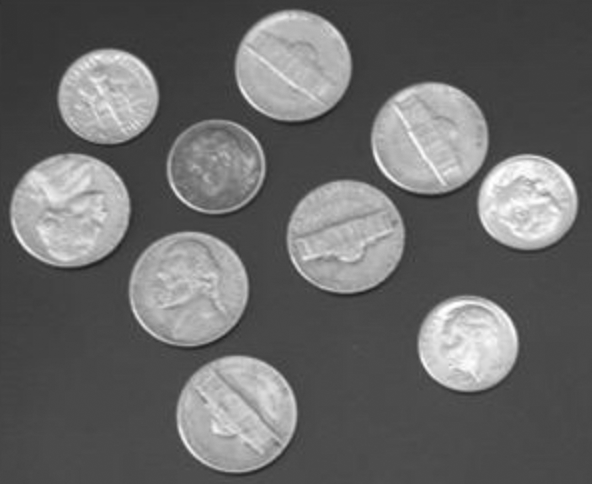

In [43]:
# Show PIL-Image
img

In [44]:
# PIL-Image in numpy-Array
img2 = np.array(img)
img2

array([[49, 52, 53, ..., 59, 59, 59],
       [50, 51, 52, ..., 58, 58, 58],
       [47, 51, 53, ..., 59, 59, 59],
       ...,
       [72, 72, 72, ..., 73, 72, 73],
       [73, 72, 71, ..., 73, 74, 72],
       [72, 71, 71, ..., 73, 73, 72]], dtype=uint8)

In [45]:
# Infos of the image array
print('shape =', img2.shape)
print('type  =', img2.dtype)
print('min   =', img2.min())
print('max   =', img2.max())
gmax = img2.max()

shape = (484, 592)
type  = uint8
min   = 31
max   = 255


In [46]:
# Create histogram from an image
def MyHistogram(src):
    # Create an empty array with size of 256 elements
    histo = np.zeros(256, dtype=int)
    
    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]
    
    # Iterate all pixels
    for y in range(0, ysize-1):
        for x in range(0, xsize-1):
            grayval = src[y][x]
            histo[grayval] += 1
    return histo

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     1     2     2     6    10
    20    31    47    50    48    61    62    72    75    83    94   108
   105    97   132   143   660  1716  2665  3316  3032  3301  3434  4204
  5973  7458  7357  7083  7729  5939  5285  5981  7027  6191  6737  7296
 11306 16755 17148 16030 13054  6765  2026   706   362   222   208   186
   161   149   152   146   122   146   128   136   134   119   124   119
   148   138   118   139   135   145   164   147   163   163   184   202
   220   229   256   283   253   262   259   228   244   248   236   250
   235   239   223   219   224   213   206   225   237   242   244   231
   217   215   249   257   264   290   265   296   307   332   345   363
   371   374   397   408   412   434   465   500   541   546   651   592
   680   737   751   783   830   832   883   890   

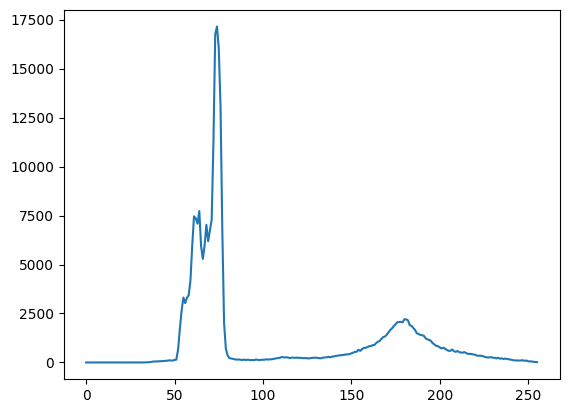

In [47]:
histo = MyHistogram(img2)
print(histo)
plt.plot(histo)

In [51]:
def MyOtsu(src):
    histo = MyHistogram(src)
    pxSum = np.sum(histo)
    
    tOpt = 0
    varMin = np.inf
    
    for t in range(256):
        # Calculate foreground and background pixel for each threshold value
        pxFor = np.sum(histo[:t])
        pxBack = np.sum(histo[t:])
        
        if pxFor == 0 or pxBack == 0:
            continue
        
        # Calculate mean/variance of fore/background
        midFor = np.sum(np.arange(t) * histo[:t]) / pxFor
        varFor = np.sum((np.arange(t) - midFor)**2 * histo[:t]) / pxFor
        midBack = np.sum(np.arange(t, 256) * histo[t:]) / pxBack
        varBack = np.sum((np.arange(t, 256) - midBack)**2 * histo[t:]) / pxBack
        
        # Calculate variance
        varW = varFor * pxFor/pxSum + varBack * pxBack/pxSum
        
        # Update minimum variance
        if t == 0 or varW < varMin:
            varMin = varW
            tOpt = t
        
        # Binarize the image using the optimal threshold
        binary_image = np.zeros_like(src)
        binary_image[src >= tOpt] = 1
        
    print(tOpt)
    return binary_image

127


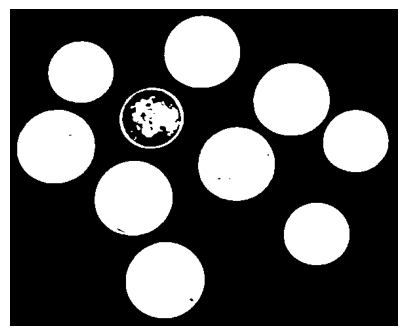

In [52]:
plt.figure(figsize = (5,5))
plt.imshow(MyOtsu(img2), cmap='gray')
plt.axis(False)
plt.show()
